# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel('KyotoFullFlower7.xls')
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df = pd.read_excel('KyotoFullFlower7.xls',skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df['Reference Name'][0]

'-'

In [6]:
df['Reference Name'] = df['Reference Name'].replace({'-': np.nan})

In [7]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [8]:
df['Reference Name'].value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [9]:
df = df.dropna(subset = ['Full-flowering date (DOY)'])
df

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

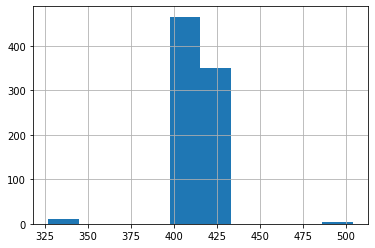

In [10]:
df['Full-flowering date'].hist(bins=10)

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

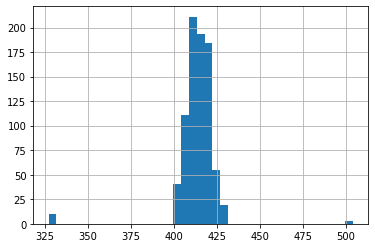

In [11]:
df['Full-flowering date'].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [12]:
df['Full-flowering date (DOY)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [13]:
before_1900 = df[df.AD < 1900]

In [14]:
before_1900['Full-flowering date (DOY)'].mean()

105.20728291316527

## 11. How about after 1900?

In [15]:
after_1900 = df[df.AD >= 1900]

In [16]:
after_1900['Full-flowering date (DOY)'].mean()

100.32743362831859

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [17]:
df[df['Data type code'] == 4].shape

(39, 6)

In [18]:
peotry = df[df['Data type code'] == 4]

## 13. Show only the years where our data was from a title in Japanese poetry

In [19]:
peotry.AD

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

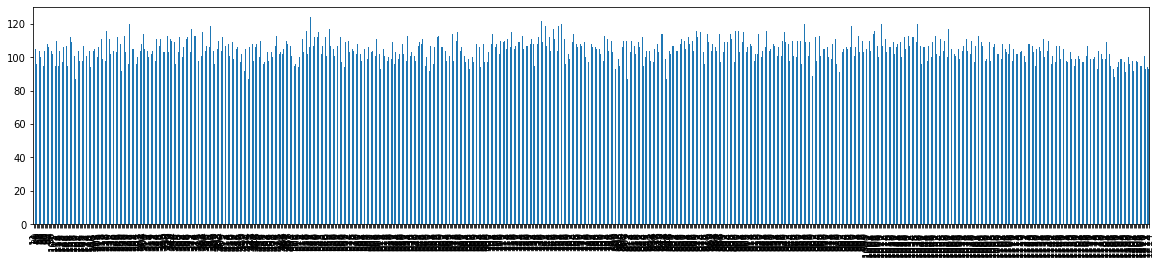

In [20]:
df['Full-flowering date (DOY)'].plot(figsize=(20, 4), kind='bar')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [21]:
rd=df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail(5)

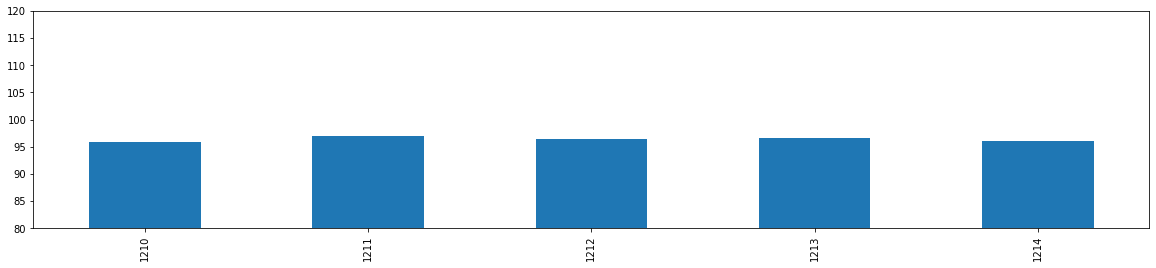

In [22]:
rd.plot(figsize=(20, 4), kind='bar',ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [23]:
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'

In [24]:
df.loc[df['Full-flowering date'] > 500, 'month'] = 'May'

In [25]:
df.loc[df['Full-flowering date'].between(400, 500), 'month'] = 'April'

In [26]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI,April
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI,April
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI,April
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,April


### 17. Using your new column, how many blossomings happened in each month?

In [27]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

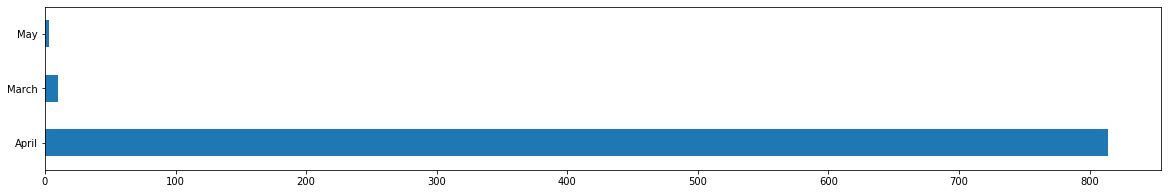

In [28]:
df.month.value_counts().plot(kind='barh',figsize = (20,3))

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [29]:
df['Full-flowering date']=df['Full-flowering date'].astype(int)

In [30]:
df['Full-flowering date'] = df['Full-flowering date'].astype(str)

In [31]:
df['Full-flowering date'].str[-2:]

11      01
14      15
30      06
50      18
52      14
63      09
65      16
68      05
88      14
90      19
91      17
93      16
94      14
95      13
101     12
107     07
111     04
112     20
116     05
122     14
125     08
129     07
132     16
140     19
148     17
149     05
154     30
156     22
157     19
158     07
        ..
1185    12
1186    05
1187    15
1188    03
1189    29
1190    07
1191    03
1192    07
1193    09
1194    09
1195    12
1196    07
1197    01
1198    04
1199    09
1200    06
1201    01
1202    08
1203    01
1204    09
1205    08
1206    07
1207    04
1208    05
1209    05
1210    09
1211    10
1212    03
1213    04
1214    03
Name: Full-flowering date, Length: 827, dtype: object

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [32]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [33]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()

11    4!!!
14    4!!!
30    4!!!
50    4!!!
52    4!!!
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [34]:
df['day-of-month'] = df['Full-flowering date'].str[-2:]

In [35]:
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name,month,day-of-month
11,812,92.0,401,1.0,2.0,NIHON-KOKI,April,01
14,815,105.0,415,1.0,2.0,NIHON-KOKI,April,15
30,831,96.0,406,1.0,2.0,NIHON-KOKI,April,06
50,851,108.0,418,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,18
52,853,104.0,414,1.0,2.0,MONTOKUTENNO-JITSUROKU,April,14


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [36]:
df['day-of-month']=df['day-of-month'].astype('str')

In [37]:
df['month']=df['month'].astype('str')

In [38]:
df['date'] = df['month']+'-'+df['day-of-month']

In [39]:
df['date']

11      April-01
14      April-15
30      April-06
50      April-18
52      April-14
63      April-09
65      April-16
68      April-05
88      April-14
90      April-19
91      April-17
93      April-16
94      April-14
95      April-13
101     April-12
107     April-07
111     April-04
112     April-20
116     April-05
122     April-14
125     April-08
129     April-07
132     April-16
140     April-19
148     April-17
149     April-05
154     March-30
156     April-22
157     April-19
158     April-07
          ...   
1185    April-12
1186    April-05
1187    April-15
1188    April-03
1189    March-29
1190    April-07
1191    April-03
1192    April-07
1193    April-09
1194    April-09
1195    April-12
1196    April-07
1197    April-01
1198    April-04
1199    April-09
1200    April-06
1201    April-01
1202    April-08
1203    April-01
1204    April-09
1205    April-08
1206    April-07
1207    April-04
1208    April-05
1209    April-05
1210    April-09
1211    April-10
1212    April-

# YOU ARE DONE.

And **incredible.**